In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

# Show all columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [561]:
df_LR = pd.read_csv('results_LIME/personality_traits_results - LIME_LR.csv', index_col=None)
df_SVM = pd.read_csv('results_LIME/personality_traits_results - LIME_SVM.csv', index_col=None)
df_KNN = pd.read_csv('results_LIME/personality_traits_results - LIME_KNN.csv', index_col=None)
df_LDA = pd.read_csv('results_LIME/personality_traits_results - LIME_LDA.csv', index_col=None)
df_RF = pd.read_csv('results_LIME/personality_traits_results - LIME_RF.csv', index_col=None)

# Number of test instances
num_test_instances = 35

# Create Empty Dataframes for each trait
df = dict()
df['Emotional Stability'] = pd.DataFrame(columns=['Classifier','Feature','Value'])
df['Extraversion'] = pd.DataFrame(columns=['Classifier','Feature','Value'])
df['Openness'] = pd.DataFrame(columns=['Classifier','Feature','Value'])
df['Conscientiousness'] = pd.DataFrame(columns=['Classifier','Feature','Value'])
df['Agreeableness'] = pd.DataFrame(columns=['Classifier','Feature','Value'])

In [562]:
def build_dataframe(clf_name, df, trait):
    df = df[df['trait'] == trait]['most_contribute'].value_counts()
    
    # Create dataframe to accomudate the results
    size = len(df)
    size = np.zeros((size,3))
    df_result = pd.DataFrame(size,columns=['Classifier','Feature','Value'])
    df_result['Classifier'] = clf_name
    
    df_result['Feature'] = df.index.values
    df_result['Value'] = df.values
    
    return df_result

def build_dataframe_trait(df, trait):
    df[trait] = pd.concat([df[trait],build_dataframe('LR',df_LR,trait)])
    df[trait] = pd.concat([df[trait],build_dataframe('SVM',df_SVM,trait)])
    df[trait] = pd.concat([df[trait],build_dataframe('KNN',df_KNN,trait)])
    df[trait] = pd.concat([df[trait],build_dataframe('LDA',df_LDA,trait)])
    df[trait] = pd.concat([df[trait],build_dataframe('RF',df_RF,trait)])

def reverse_dataframe(df, trait):
    categories = df[trait]['Feature'].unique()

    data = np.zeros((5,len(categories)), dtype=int)
    data = pd.DataFrame(data=data, columns=categories)
    data['Classifier'] = pd.Series(['LR','SVM','KNN','LDA','RF'])

    for row in df[trait].iterrows():
        clf = row[1]['Classifier']
        feature = row[1]['Feature']
        value = row[1]['Value']
        data.loc[data['Classifier'] == clf, feature] = value
        
    return data    

In [564]:
df_rev = dict()

for trait in ['Emotional Stability','Extraversion','Openness','Conscientiousness','Agreeableness']:
    build_dataframe_trait(df,trait)
    df_rev[trait] = reverse_dataframe(df, trait)

df['Extraversion']

,Classifier,Feature,Value
0,LR,dur_Shopping,25
1,LR,freq_Shopping,6
2,LR,freq_Medical,3
3,LR,freq_Unknown,1
0,SVM,freq_Unknown,19
1,SVM,freq_Social,15
2,SVM,freq_Communication,1
0,KNN,freq_Communication,26
1,KNN,freq_Unknown,6
2,KNN,freq_Social,3


In [570]:
df_rev['Extraversion'] #.set_index(['Classifier'])

,dur_Shopping,freq_Shopping,freq_Medical,freq_Unknown,freq_Social,freq_Communication,dur_Personalization,freq_calls,freq_Music...Audio,dur_Productivity,dur_calls
0,25,6,3,1,0,0,0,0,0,0,0
1,0,0,0,19,15,1,0,0,0,0,0
2,0,0,0,6,3,26,0,0,0,0,0
3,0,0,0,3,0,0,26,6,0,0,0
4,15,0,0,0,0,0,0,17,1,1,1


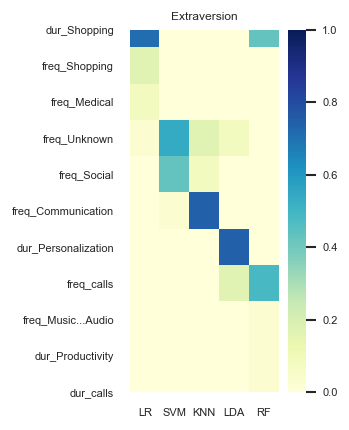

In [703]:
sns.set(font_scale=0.6)

data = df_rev['Extraversion'].iloc[:,0:-1].transpose() / num_test_instances
data.columns = ['LR','SVM','KNN','LDA','RF']
plt.figure(figsize=(2, 4))
ax = sns.heatmap(data, cmap="YlGnBu", linewidths=0, vmin=0, vmax=1)
ax.set_title('Extraversion')
plt.savefig('figures/heatmap-LIME-top-1-feature-Extraversion.png', dpi=300, bbox_inches="tight")

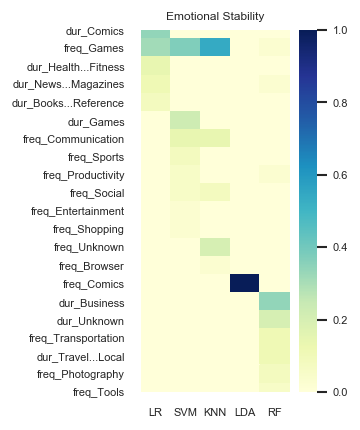

In [697]:
data = df_rev['Emotional Stability'].iloc[:,0:-1].transpose() / num_test_instances
data.columns = ['LR','SVM','KNN','LDA','RF']
plt.figure(figsize=(2, 4))
ax = sns.heatmap(data, cmap="YlGnBu", linewidths=0, vmin=0, vmax=1)
ax.set_title('Emotional Stability')
plt.savefig('figures/heatmap-LIME-top-1-feature-Emotional-Stability.png', dpi=300, bbox_inches="tight")

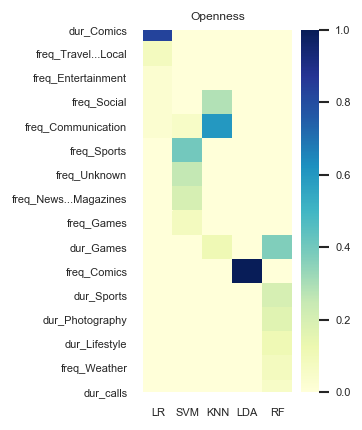

In [698]:
data = df_rev['Openness'].iloc[:,0:-1].transpose() / num_test_instances
data.columns = ['LR','SVM','KNN','LDA','RF']
plt.figure(figsize=(2, 4))
ax = sns.heatmap(data, cmap="YlGnBu", linewidths=0, vmin=0, vmax=1)
ax.set_title('Openness')
plt.savefig('figures/heatmap-LIME-top-1-feature-Openness.png', dpi=300, bbox_inches="tight")

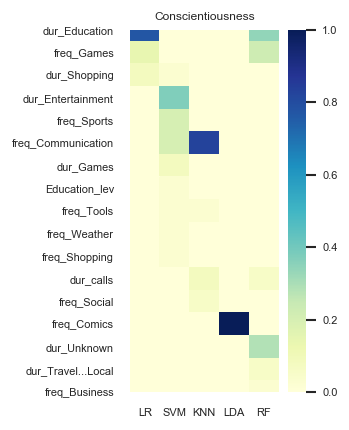

In [699]:
data = df_rev['Conscientiousness'].iloc[:,0:-1].transpose() / num_test_instances
data.columns = ['LR','SVM','KNN','LDA','RF']
plt.figure(figsize=(2, 4))
ax = sns.heatmap(data, cmap="YlGnBu", linewidths=0, vmin=0, vmax=1)
ax.set_title('Conscientiousness')
plt.savefig('figures/heatmap-LIME-top-1-feature-Conscientiousness.png', dpi=300, bbox_inches="tight")

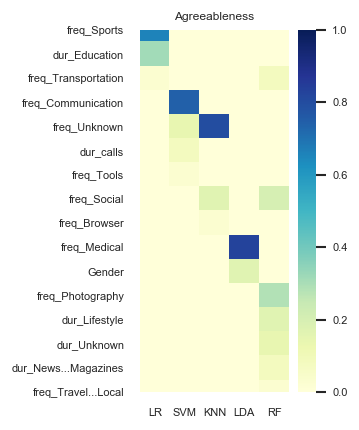

In [700]:
data = df_rev['Agreeableness'].iloc[:,0:-1].transpose() / num_test_instances
data.columns = ['LR','SVM','KNN','LDA','RF']
plt.figure(figsize=(2, 4))
ax = sns.heatmap(data, cmap="YlGnBu", linewidths=0, vmin=0, vmax=1)
ax.set_title('Agreeableness')
plt.savefig('figures/heatmap-LIME-top-1-feature-Agreeableness.png', dpi=300, bbox_inches="tight")

11


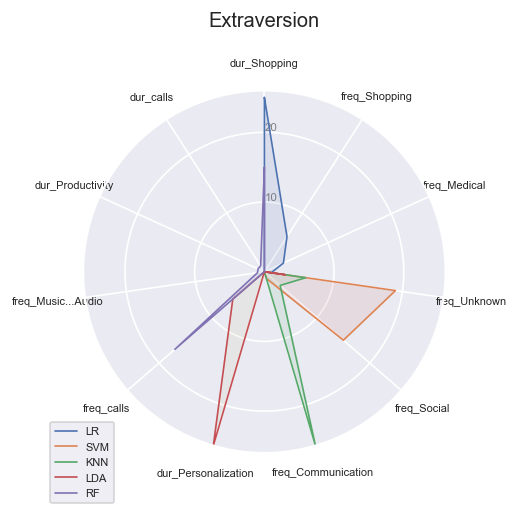

In [712]:
from math import pi

# ------- PART 1: Create background
 
# number of variable
categories = df['Extraversion']['Feature'].unique()
N = len(categories)
print(N)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,26)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=[25, 6, 3, 1, 0, 0, 0, 0, 0, 0, 0]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="LR")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=[0, 0, 0, 19, 15, 1, 0, 0, 0, 0, 0]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="SVM")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=[0, 0, 0, 6, 3, 26, 0, 0, 0, 0, 0]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="KNN")
ax.fill(angles, values, 'g', alpha=0.1)

# Ind4
values=[0, 0, 0, 3, 0, 0, 26, 6, 0, 0, 0]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="LDA")
ax.fill(angles, values, 'y', alpha=0.1)

# Ind5
values=[15, 0, 0, 0, 0, 0, 0, 17, 1, 1, 1]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="RF")
ax.fill(angles, values, 'p', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
ax.set_title('Extraversion', y = 1.15, fontsize=12)
plt.savefig('figures/radar.png', dpi=500, bbox_inches="tight")